## 1. HAVE A LOOK at the data

In [1]:
"""
experiment conducted with 88um thickness double-sided tape and 0.026%wt diameter 1um fluorescence particle.For every video 
recorded from one experiment, we choose the inital 500 frames and last frames to validate its stability within 15min(5fps). 

tested fluid : 1. Water   2. 10mg/ml Tcb2

used data: trail242-trail248. All the supporting videos are saved in the dropbox 1007-viscosity, including the MOSAIC videos. 

MOSAIC optimized tracking parameter: radius:3 pixels (~ 0.5 micron radius), cuttof(0-1):0.1, per/abs: 0.05.   

how you set the propertirs?  Go to image --> properties ---> frame interval


"""


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
Tcb2_trail248_2 = pd.read_csv('tcb2_trail248_last500_Results.csv')
Tcb2_trail248_1= pd.read_csv('tcb2_trail248_initia;500_Results.csv')

In [3]:
Tcb2_trail248_2.describe()

,,Trajectory,Trajectory length,MSS: slope,MSS: y-axis intercept,MSD: slope,MSD: y-axis intercept,Diffusion Coefficient D2 (m^2/s),Distance (m),AvgDistance (m/frame),...,Bending,Bending (linear),Efficiency,Pixel size,Time interval,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,1.370000e+02,1.370000e+02,...,137.000000,137.000000,137.000000,1.370000e+02,1.370000e+02,0.0,0.0,1.000000e+00,0.0,1.00000
mean,69.000000,117.496350,57.262774,0.599212,0.136197,1.326044,-27.708540,4.317303e-13,2.020186e-05,3.233292e-07,...,0.027022,-0.014274,0.212428,1.050000e-07,2.000000e-01,NaN,NaN,4.320000e-13,NaN,0.00101
std,39.692569,81.025879,94.502044,0.295478,0.270074,0.587625,1.537839,4.069980e-13,3.513034e-05,1.098451e-07,...,0.210041,0.536164,0.174906,1.195511e-22,5.014338e-16,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,6.000000,-0.430000,-1.012000,-1.295000,-33.295000,8.670000e-16,6.690000e-07,4.190000e-08,...,-0.541000,-2.198000,0.000024,1.050000e-07,2.000000e-01,NaN,NaN,4.320000e-13,NaN,0.00101
25%,35.000000,48.000000,12.000000,0.485000,0.006000,1.082000,-27.987000,1.750000e-13,2.550000e-06,2.640000e-07,...,-0.073000,-0.253000,0.066000,1.050000e-07,2.000000e-01,NaN,NaN,4.320000e-13,NaN,0.00101
50%,69.000000,106.000000,19.000000,0.620000,0.193000,1.456000,-27.478000,2.920000e-13,5.560000e-06,3.220000e-07,...,0.010000,-0.006000,0.176000,1.050000e-07,2.000000e-01,NaN,NaN,4.320000e-13,NaN,0.00101
75%,103.000000,176.000000,47.000000,0.746000,0.295000,1.715000,-26.750000,6.030000e-13,1.550000e-05,4.010000e-07,...,0.129000,0.212000,0.331000,1.050000e-07,2.000000e-01,NaN,NaN,4.320000e-13,NaN,0.00101
max,137.000000,279.000000,401.000000,1.802000,0.796000,3.366000,-25.273000,2.640000e-12,1.530000e-04,5.700000e-07,...,0.724000,1.779000,0.758000,1.050000e-07,2.000000e-01,NaN,NaN,4.320000e-13,NaN,0.00101


## 2. Define data cleaning function

In [4]:
"""
why we have to clean the data ?  When we look at the column 'MSS slope'(scalling coefficient vs moment_order) , it shows t^gamma_p~ |x|^p. If it follows
brownian motion MSD= t^2,  slope should around 0.5. 

The MSD slope is around 0.5,the particles can be considered as brownian motion. 
The the MSD slope is 1, the parctile is moving towards one direction. 
For the slope range 0-0.5, the system is in sub-diffusive regime; For the slope range 0.5-1, the system in the super-diffusive regime. 

Therefore, we set a range 0.4 ~ 0.6 to clean the data.

More detailed explanation: 
For all strongly self-similar processes, the MSS shows a straight line through the origin as c0 is always equal to 0. 
The slope of this line is an excellent measure for the type of the observed motion. Finding this slope using a linear least 
squares fit is a very robust procedure due to the almost perfect linearity of the MSS for strongly self-similar processes. 
Moreover, the MSS slope has good and uniform sensitivity to detect different modes of motion within the same trajectory. 
For normal (free) and strongly self-similar diffusion, the MSS slope is 1/2. A slope of 1 indicates ballistic, i.e., uniform and
directed motion. A slope of 0 characterizes a stationary object. The region between 0 and 1/2 is the sub-diffusive regime 
(e.g., confined diffusion) and between 1/2 and 1 is the super-diffusive regime (e.g., diffusion with overlayed deterministic 
drift, Le´vy flights). Every strongly self-similar process will yield scaling coefficients cm that linearly depend on m.
A curved or kinked plot is indicative of a weakly self-similar process (Ferrari et al., 2001).


"""
#define data cleaning function

def clean(data,name):
    data1= data[data['MSS: slope'] > 0.4]
    data1= data[data['MSS: slope'] < 0.6]
    # Alright, let's check out our data
    
    print('before cleaned:{}'.format(data['Diffusion Coefficient D2 (m^2/s)'].mean()))
    print('after cleaned:{}'.format(data1['Diffusion Coefficient D2 (m^2/s)'].mean()))
    fig, axes = plt.subplots(1, 2, figsize = (10, 3),dpi = 150)
    axes = axes.ravel()

    axes[0].hist(data['Diffusion Coefficient D2 (m^2/s)'],bins=100)
    axes[0].set_xlabel('before cleaned')
    axes[1].hist(data1['Diffusion Coefficient D2 (m^2/s)'],bins=100)
    axes[1].set_xlabel('after cleaned')
    axes[0].set_title(name+'\nDiffusion Coefficient D2 (m^2/s)')
    plt.tight_layout() # Makes the plot look nicer
    plt.show()
    
    viscosity1=4.354472*10**(-16)/data['Diffusion Coefficient D2 (m^2/s)'].mean()
    viscosity2=4.354472*10**(-16)/data1['Diffusion Coefficient D2 (m^2/s)'].mean()
    
    return data1['Diffusion Coefficient D2 (m^2/s)'].mean(),viscosity1,data1['Diffusion Coefficient D2 (m^2/s)'].mean(),viscosity2,name

before cleaned:4.3173027007299266e-13
after cleaned:1.7701744999999998e-13


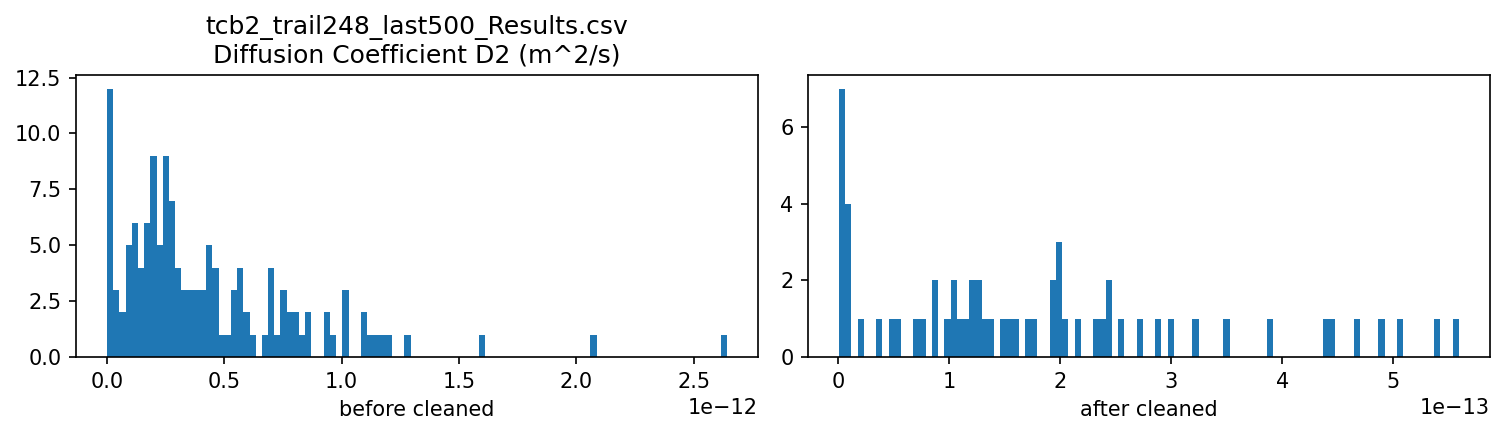

In [5]:
X=clean(Tcb2_trail248_2,'tcb2_trail248_last500_Results.csv')

## 3.LOAD IN FROM File 

2-2-:

before cleaned:1.7273501351606784e-13
after cleaned:9.524864291666665e-14


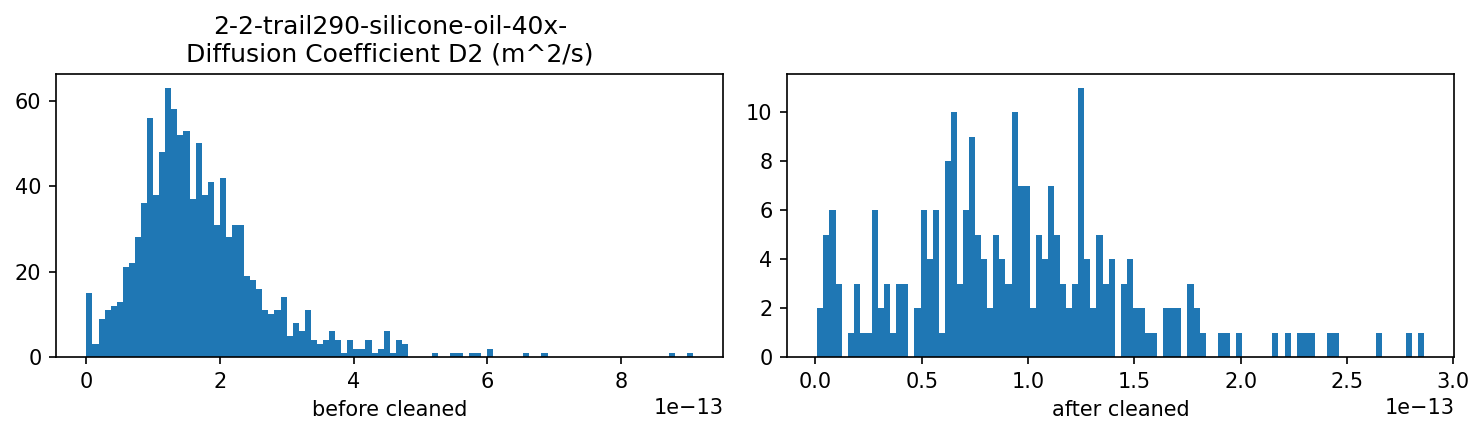

2-tr:

before cleaned:3.0635219148765694e-13
after cleaned:1.582299452662722e-13


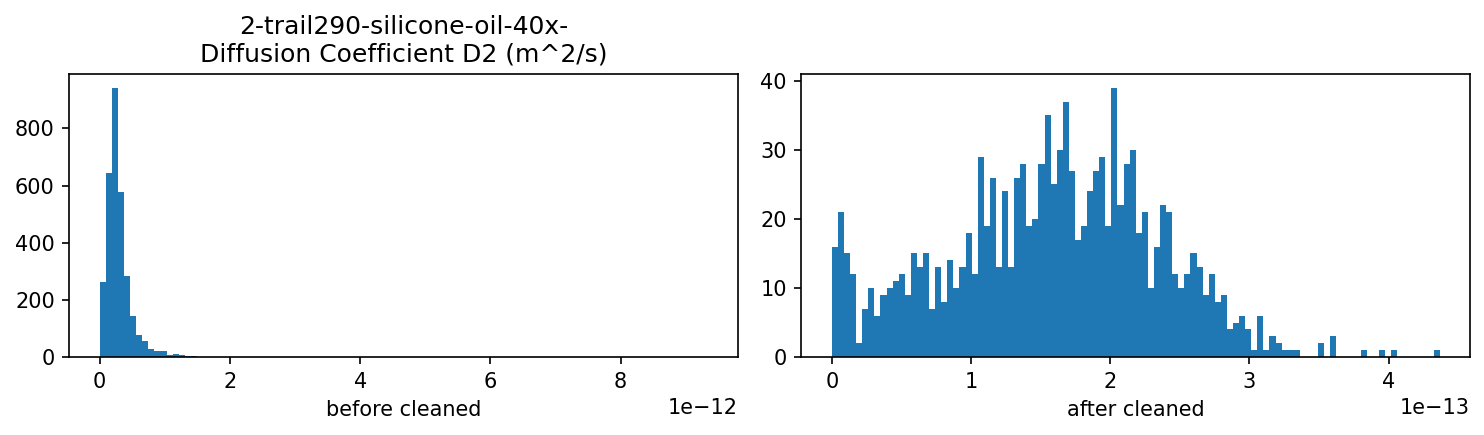

3-di:

before cleaned:2.2225087978766434e-11
after cleaned:6.331710004329012e-12


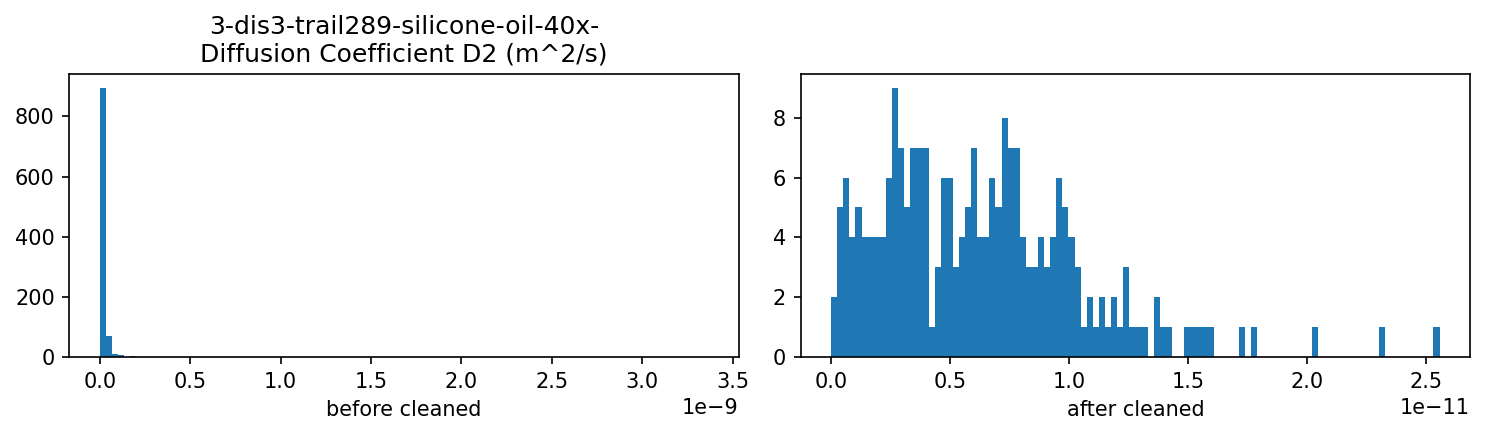

3-la:

before cleaned:2.1904692857142853e-11
after cleaned:1.926925e-12


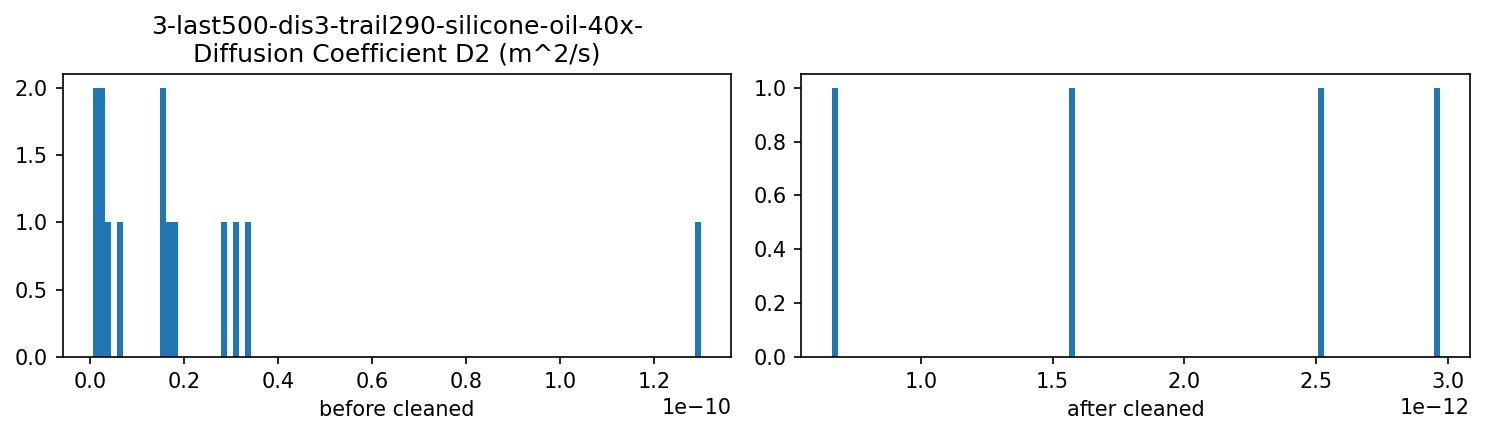

one :

before cleaned:3.564260814427389e-11
after cleaned:7.045154310112317e-15


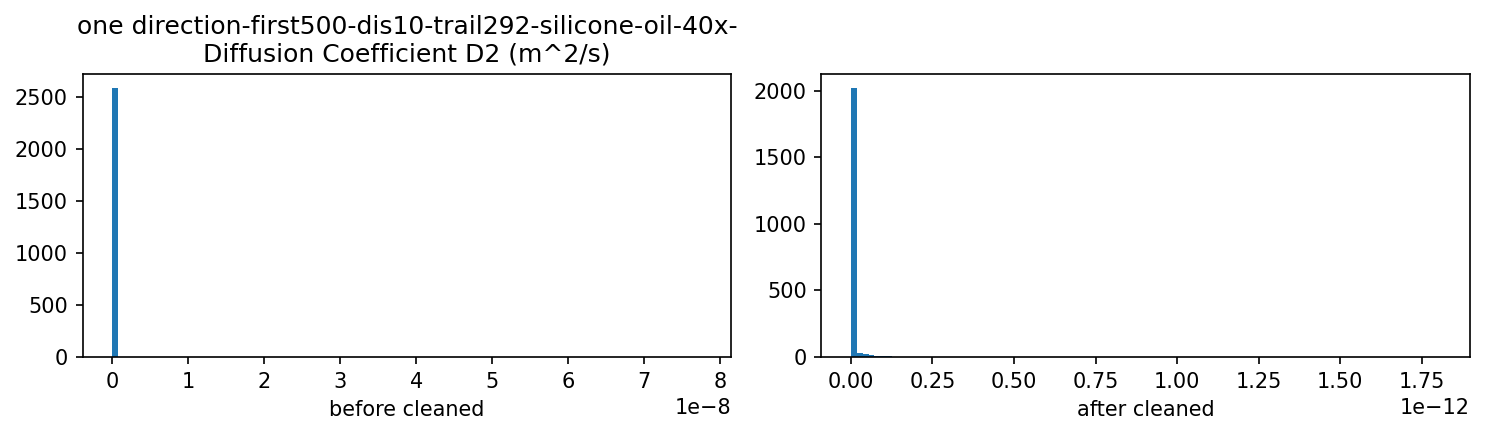

one :

before cleaned:4.169304255948915e-14
after cleaned:1.5341013076629807e-16


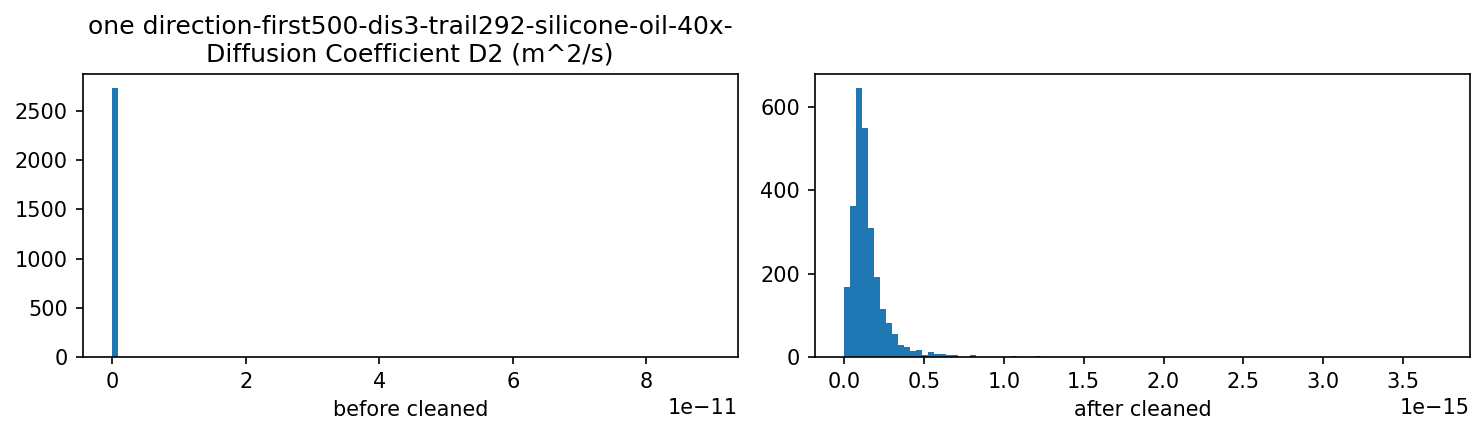

tcb2:

before cleaned:2.0729195402298852e-13
after cleaned:1.7011351351351345e-13


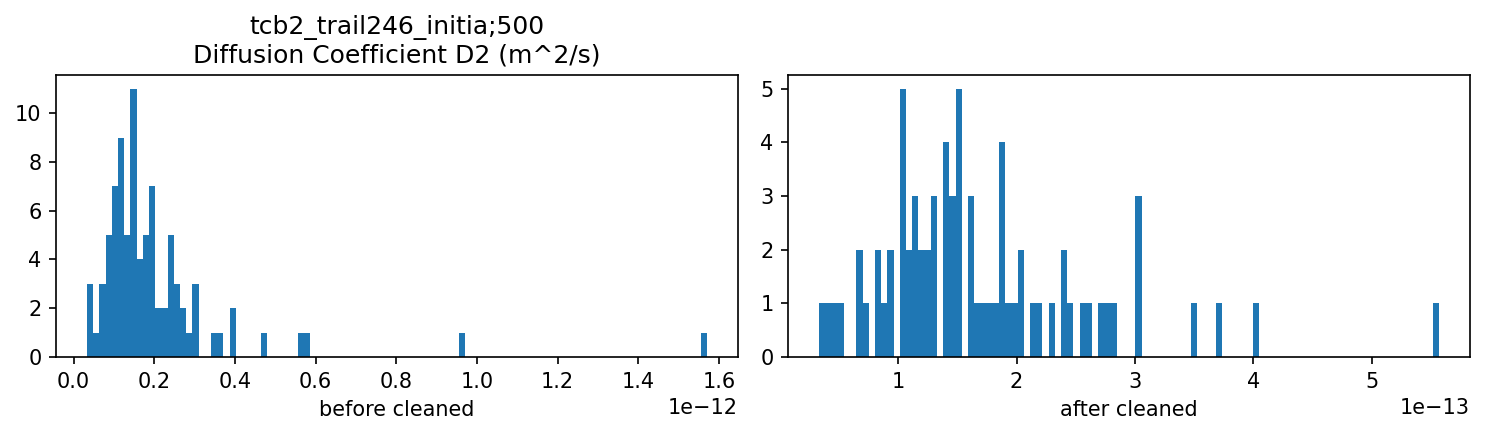

tcb2:

before cleaned:2.1117012072481908e-13
after cleaned:1.1604148612424251e-13


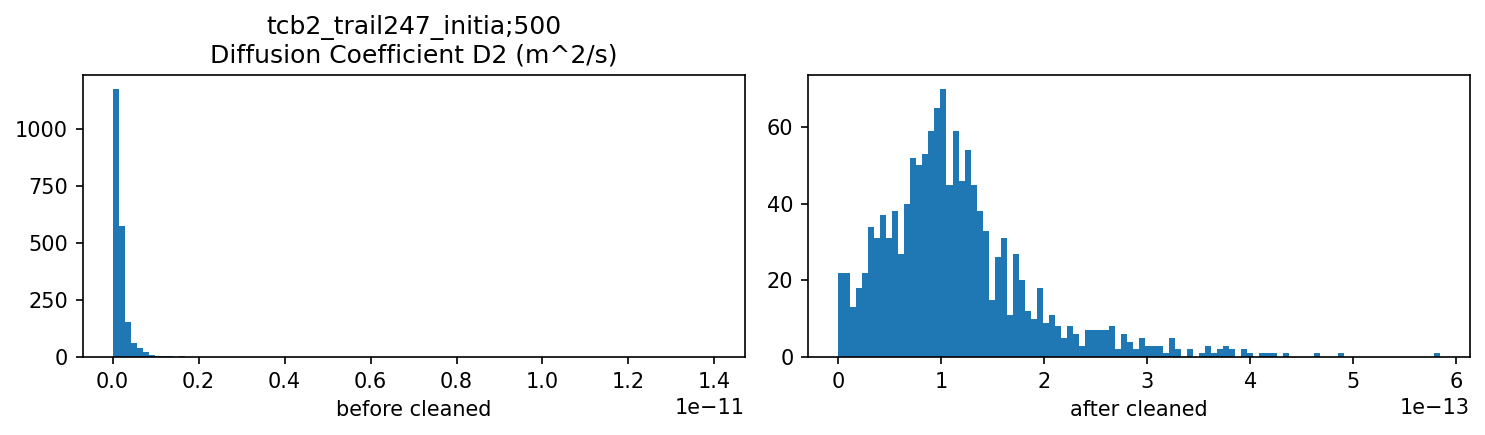

tcb2:

before cleaned:1.9157772175573434e-17
after cleaned:1.0787971330306233e-17


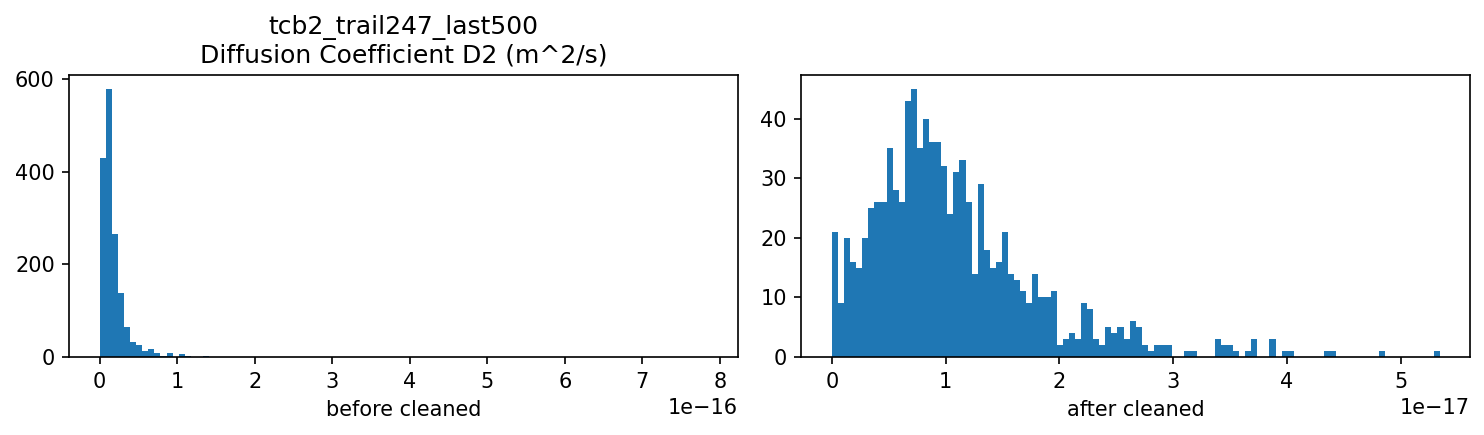

tcb2:

before cleaned:4.632944634146347e-13
after cleaned:1.838342000000001e-13


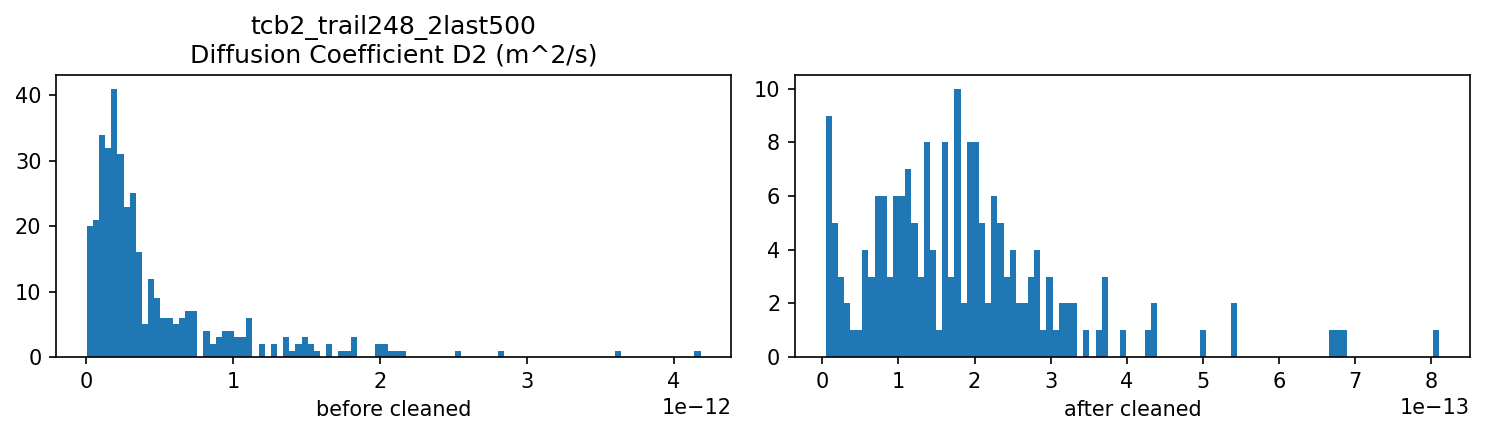

tcb2:

before cleaned:3.6702352941176457e-13
after cleaned:2.675040000000001e-13


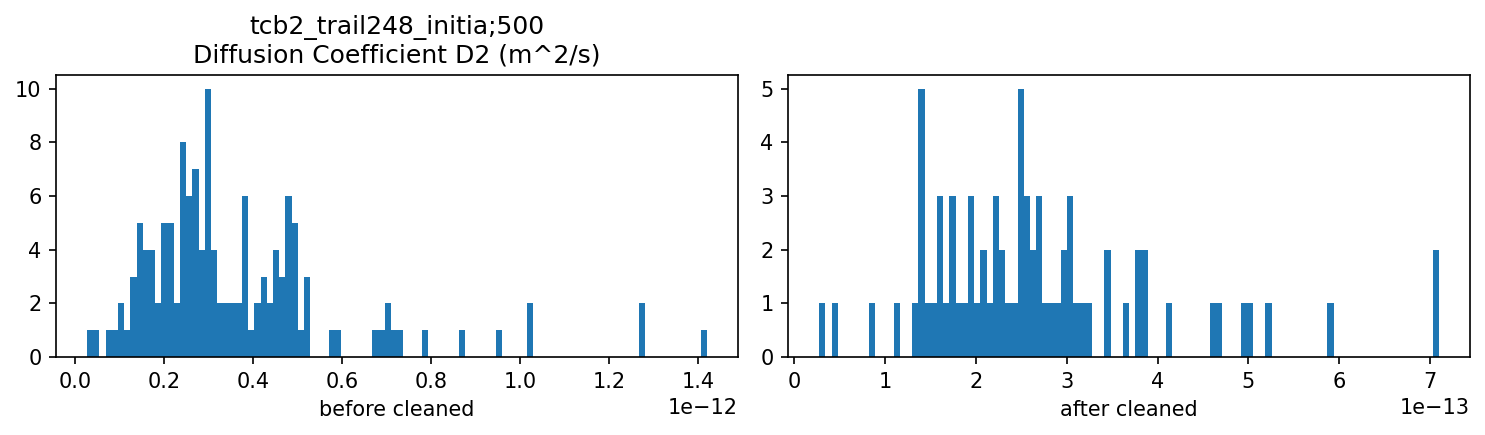

tcb2:

before cleaned:4.3173027007299266e-13
after cleaned:1.7701744999999998e-13


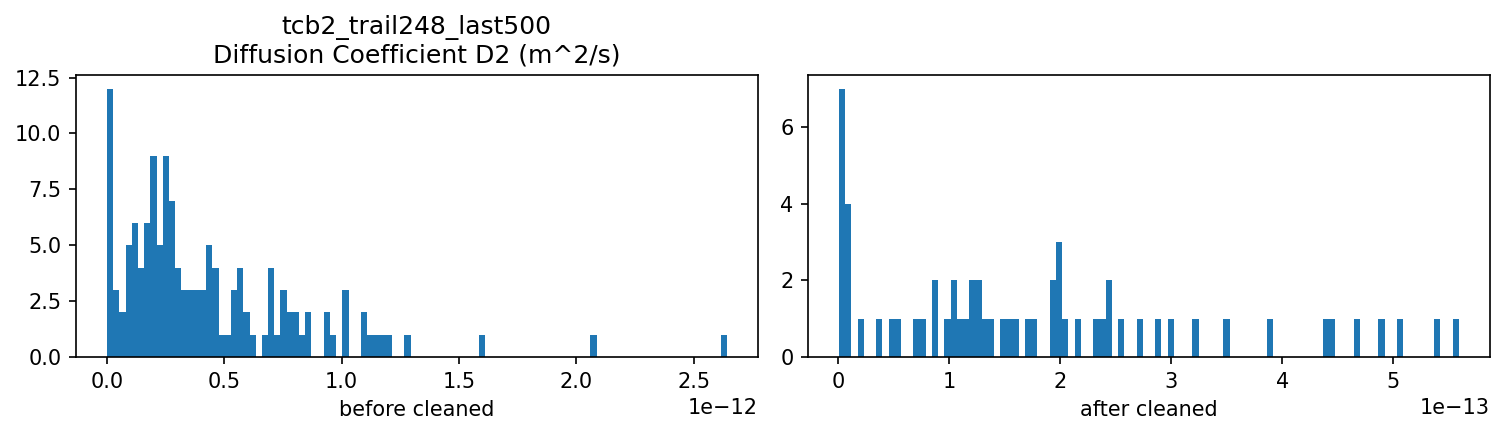

trai:

before cleaned:4.479778653945336e-13
after cleaned:3.088036944818306e-13


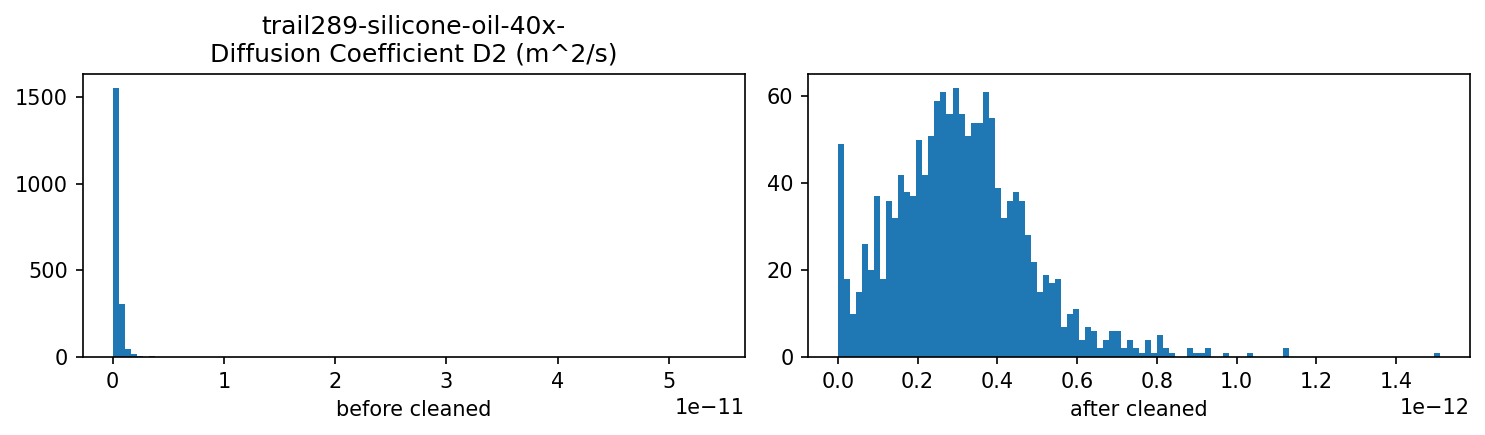

trai:

before cleaned:3.9701000000000004e-13
after cleaned:4.393166666666667e-13


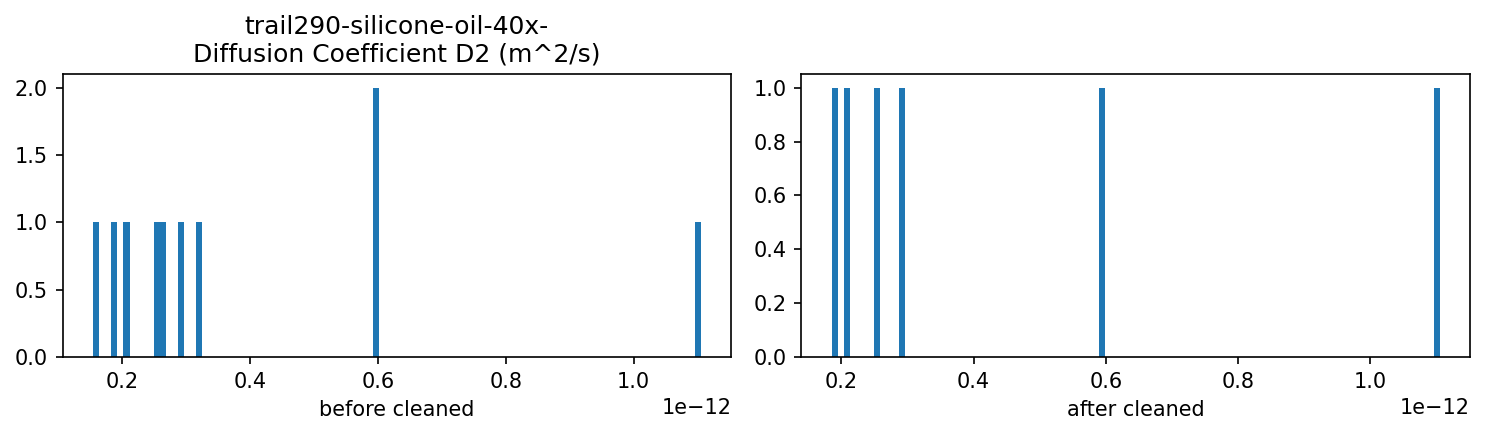

trai:

before cleaned:1.9579694625071567e-12
after cleaned:3.380989291408319e-13


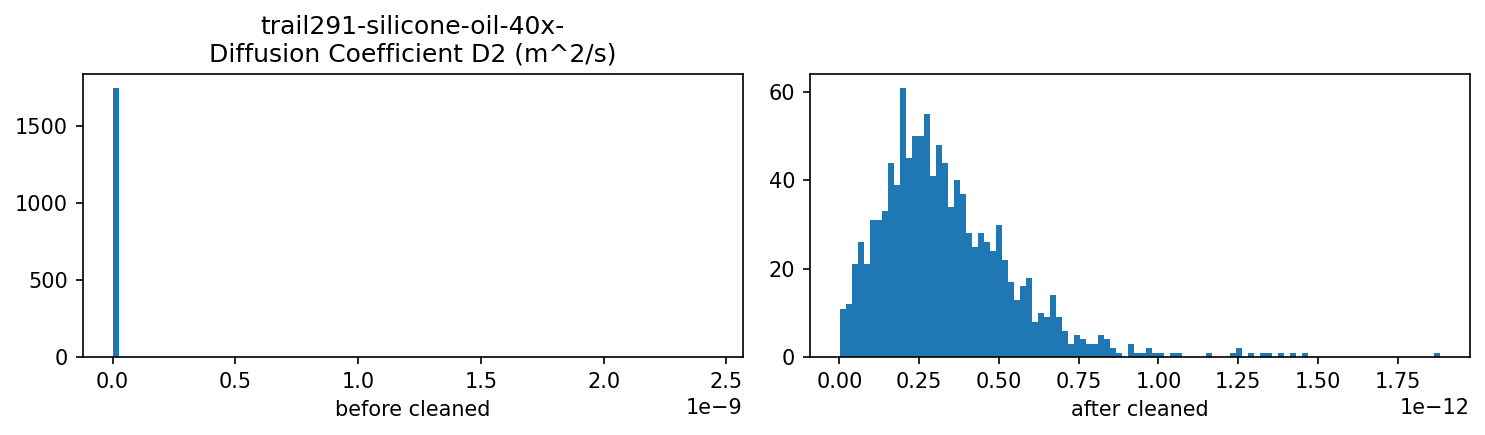

wate:

before cleaned:6.954097217241379e-13
after cleaned:3.8410230769230777e-16


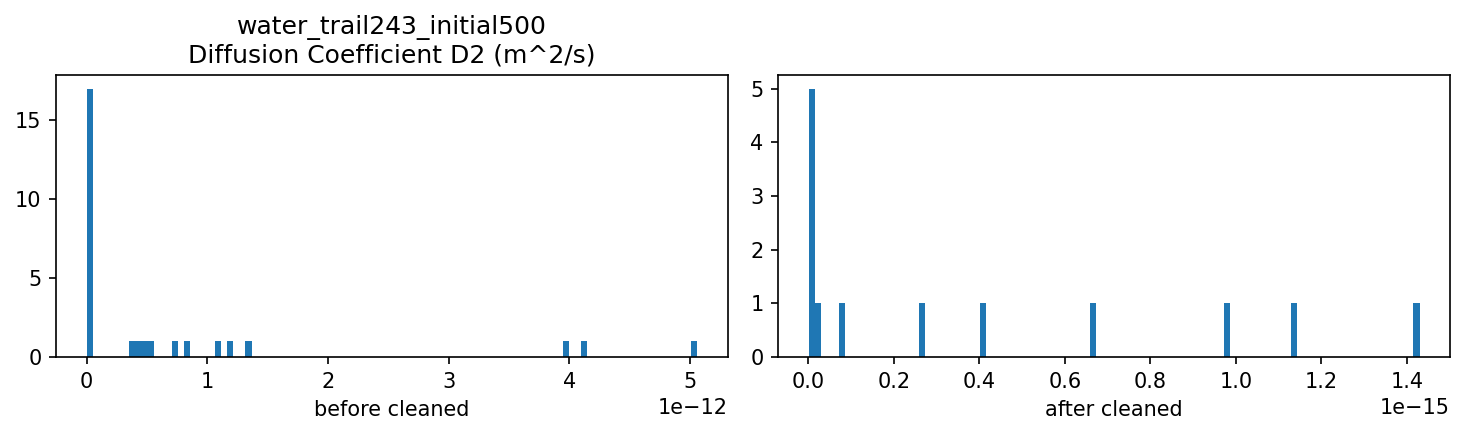

wate:

before cleaned:3.725088747697971e-13
after cleaned:2.642285829268293e-13


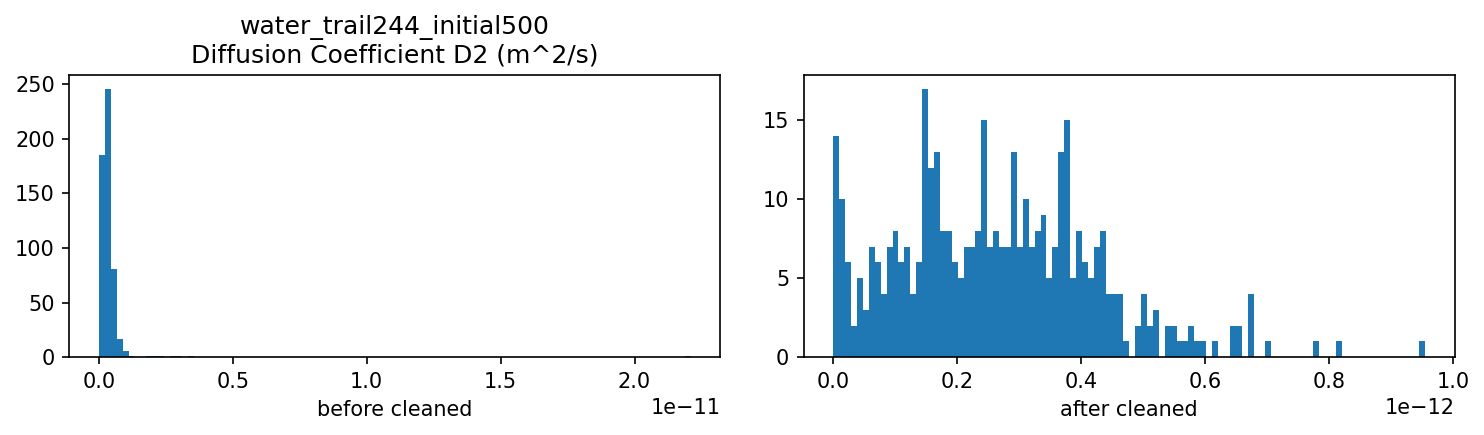

wate:

before cleaned:3.3225608510638286e-13
after cleaned:3.003557096774192e-13


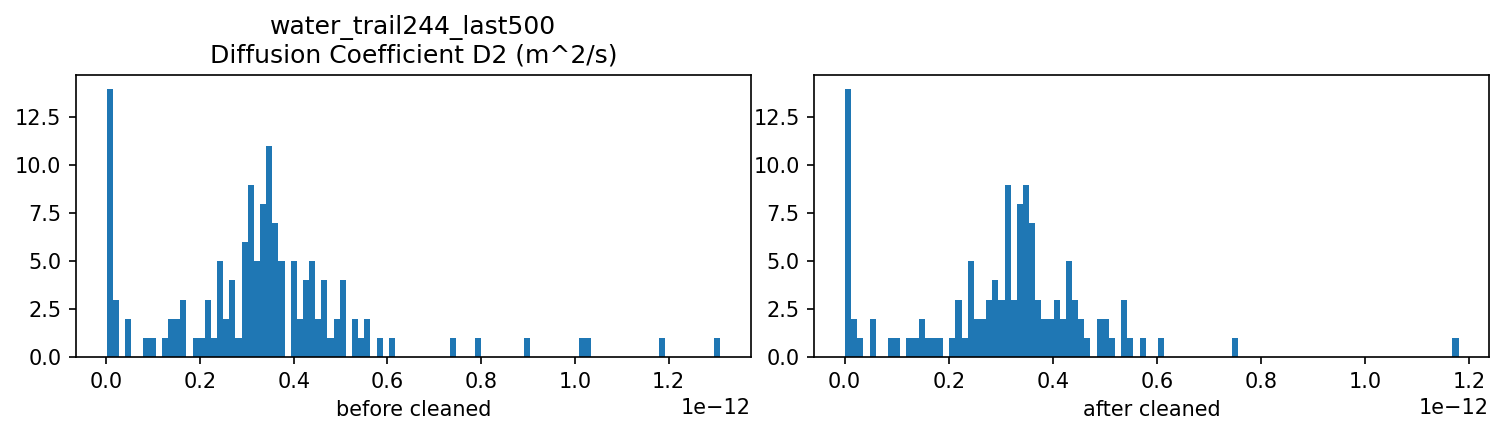

wate:

before cleaned:5.312129932739485e-13
after cleaned:3.220493274950001e-13


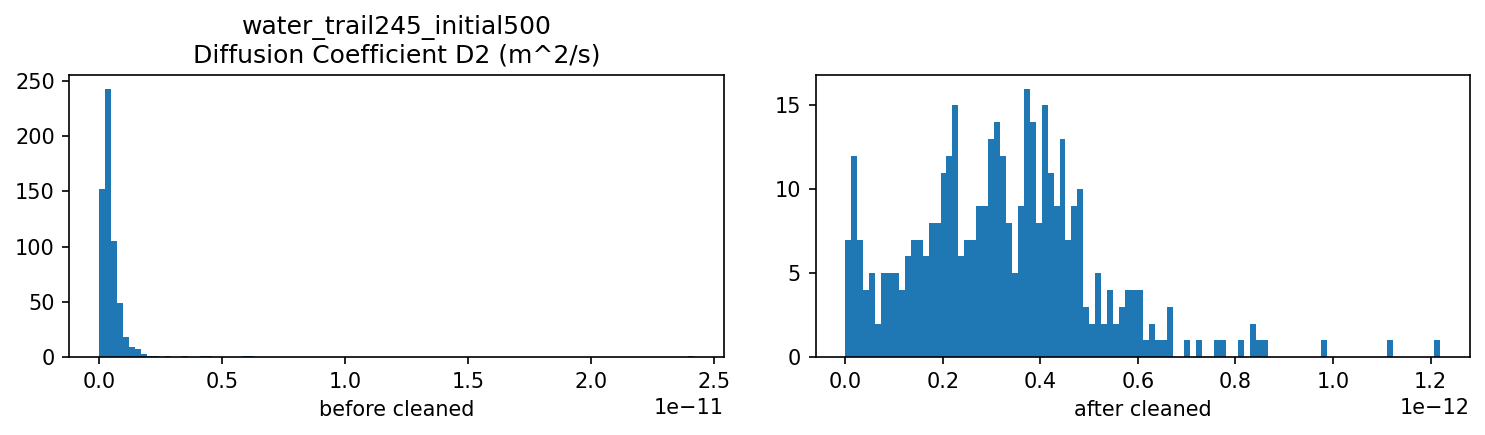

wate:

before cleaned:4.897523265306122e-13
after cleaned:3.0304406837606854e-13


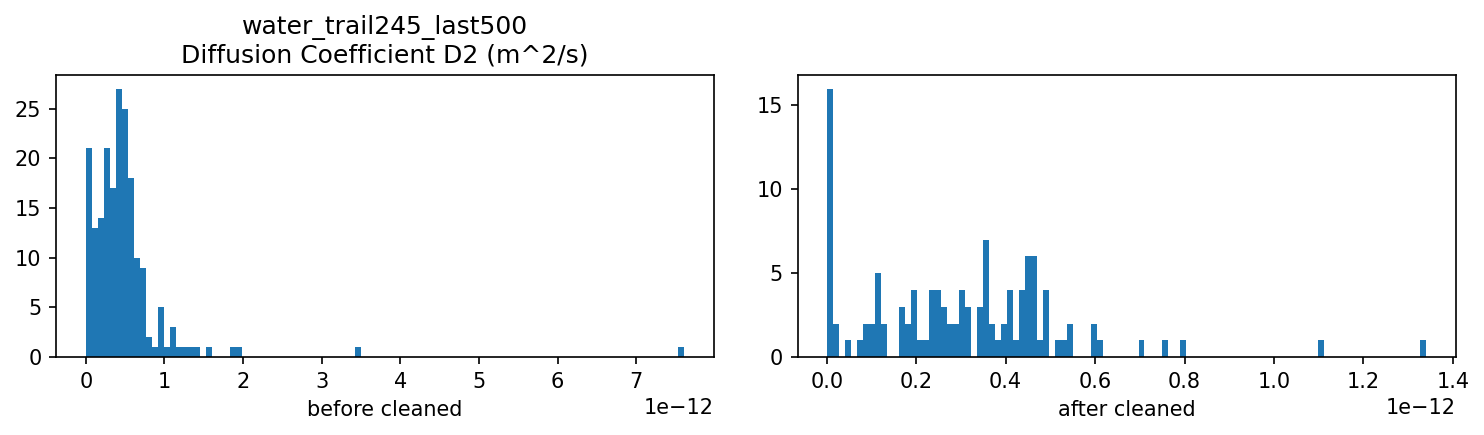

In [20]:
import glob
ret = []
for file_name in glob.glob('*.csv'):
    df = pd.read_csv(file_name)
    print('{}:\n'.format(file_name[:4]))
    ret.append(clean(df,file_name[:-12]))

In [21]:

"""
<dx^2>=4Dt, we calculate the diffusion coefficient. 

According to stoke's equation, D= kT/(6pi*yita*a). 

K: boltzman constant
T : Temperature in kelvin
a: radius of fluorescence particle
η : dynamic viscosity
  
When we get the dynamic viscosity of fluid
"""
df_ret=pd.DataFrame(ret,columns=['diff coef(m^2/s)','viscosity(PaS)','after clean(m^/s)','viscosity(PaS)','name'])
# from pprint import pprint
# print(df_ret)
df_ret[:-1]

,diff coef(m^2/s),viscosity(PaS),after clean(m^/s),viscosity(PaS),name
0,9.524864e-14,0.002521,9.524864e-14,0.004572,2-2-trail290-silicone-oil-40x-
1,1.582299e-13,0.001421,1.582299e-13,0.002752,2-trail290-silicone-oil-40x-
2,6.331710e-12,0.000020,6.331710e-12,0.000069,3-dis3-trail289-silicone-oil-40x-
3,1.926925e-12,0.000020,1.926925e-12,0.000226,3-last500-dis3-trail290-silicone-oil-40x-
4,7.045154e-15,0.000012,7.045154e-15,0.061808,one direction-first500-dis10-trail292-silicone...
5,1.534101e-16,0.010444,1.534101e-16,2.838451,one direction-first500-dis3-trail292-silicone-...
6,1.701135e-13,0.002101,1.701135e-13,0.002560,tcb2_trail246_initia;500
7,1.160415e-13,0.002062,1.160415e-13,0.003753,tcb2_trail247_initia;500
8,1.078797e-17,22.729532,1.078797e-17,40.364141,tcb2_trail247_last500
9,1.838342e-13,0.000940,1.838342e-13,0.002369,tcb2_trail248_2last500


## Part2 Tracetejory  Analysis